## CMPE482 - Assignment 4 - Mehmet Burak Kurutmaz

### 9.3

#### (a) Draw Hello Graph

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import numpy.linalg as LA

In [2]:
_H = np.ones((8,6),dtype=np.int);
_H[0:3,2:4] = 0;
_H[5:8,2:4] = 0;

In [3]:
_E = np.ones((8,6),dtype=np.int);
_E[2,2:6] = 0;
_E[5,2:6] = 0;

In [4]:
_L = np.ones((8,6),dtype=np.int);
_L[0:6,2:6] = 0;

In [5]:
_O = np.ones((8,6),dtype=np.int);
_O[2:6,2:4] = 0;

In [6]:
A = np.zeros((15,40),dtype=np.int);
A[1:9,1:7] = _H;
A[2:10,9:15] = _E;
A[3:11,17:23] = _L;
A[4:12,25:31] = _L;
A[5:13,33:39] = _O;

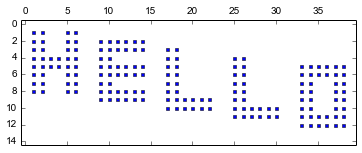

In [7]:
plt.spy(A,markersize = 3);

#### (b) Plot Singular Values

In [8]:
U,S,V = LA.svd(A, full_matrices=False);
print "Singular values:\n\n",S

Singular values:

[  1.03832691e+01   5.13177886e+00   3.18775603e+00   2.93826395e+00
   2.06251517e+00   1.83760006e+00   1.22698575e+00   9.87917873e-01
   7.37985369e-01   6.32884999e-01   4.28460099e-16   8.14726354e-17
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


In [9]:
rank_A = LA.matrix_rank(A);
print "Rank of A: ", rank_A;

Rank of A:  10


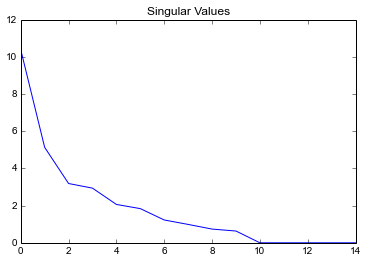

In [10]:
plt.title("Singular Values");
plt.plot(S);

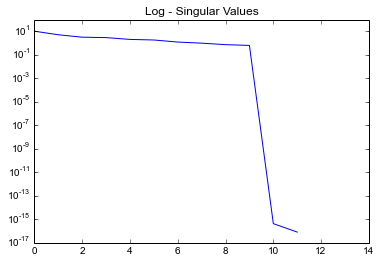

In [11]:
plt.title("Log - Singular Values");
plt.semilogy(S);

Matrix $A$ has 15 row, therefore it has 15 singular values. On the other hand, it has 10 singular values that are greater than 0, so its rank is 10.

#### (c) Low rank approximations

Let $B$ be the best approximation with rank $k$ that minimizes 2 norm. Then $B = \sum^k_{i=1} \sigma_i u_i v^*_i $.

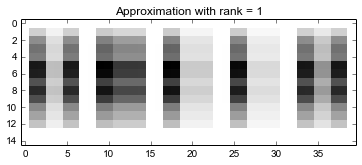

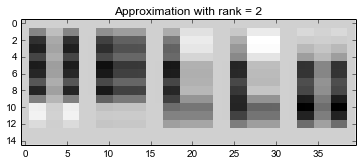

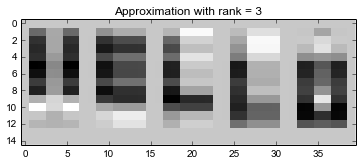

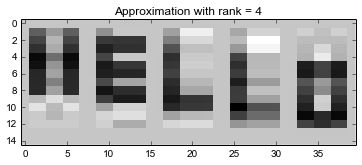

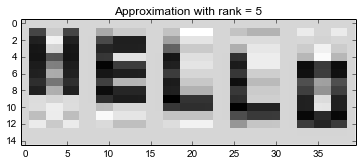

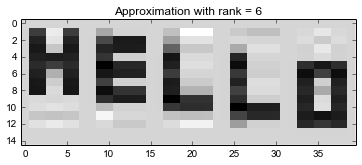

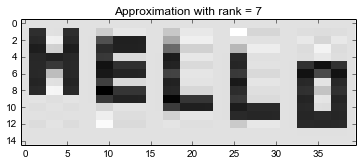

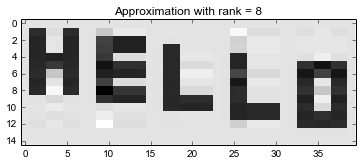

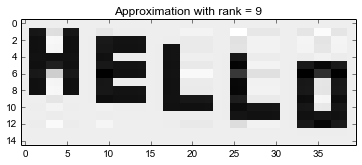

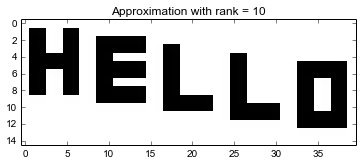

In [12]:
B = np.zeros((15,40),dtype=np.float);
for i in range(rank_A):
    B += S[i]*np.einsum("i,j->ij",U[:,i],V[i,:]);
    plt.imshow(B,cmap="gray_r",interpolation="none");
    plt.title('Approximation with rank = ' + str(i+1));
    plt.show();

### 10.4

#### (a)

Let $e_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $e_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$. And let $A$ be any $2 \times 2$ matrix. If $A = \begin{bmatrix} a_1 \mid a_2 \end{bmatrix}$, then

\begin{equation}
\begin{split}
Ae_1 &= a_1 \\
Ae_2 &= a_2
\end{split}
\end{equation}

Therefore, the linear transformation that $A$ defines for any vector $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$,

$$
Ax = x_1 a_1 + x_2 a_2
$$

is characterized exactly by transformation of the standard basis.

$J = \begin{bmatrix} c & s \\ -s & c \end{bmatrix}$, then J makes the following transformation to basis,

\begin{equation}
\begin{split}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} & \to \begin{bmatrix} c \\ -s \end{bmatrix} \\
\begin{bmatrix} 0 \\ 1 \end{bmatrix} & \to \begin{bmatrix} s \\ c \end{bmatrix} \\
\end{split}
\end{equation}

which is a clockwise rotation by angle $\theta$. And

$$
F = \begin{bmatrix} -c & s \\ s & c \end{bmatrix} = \begin{bmatrix} c & s \\ -s & c \end{bmatrix} 
\begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix} = J \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}
$$

which means F, firstly reflects the point from y axis, then rotates it by angle $\theta$.

In [13]:
J = lambda theta: np.array([[np.cos(theta) , np.sin(theta)] , [-np.sin(theta) , np.cos(theta)]]); # rotator
F = lambda theta: np.array([[-np.cos(theta) , np.sin(theta)] , [np.sin(theta) , np.cos(theta)]]); # reflector

In [14]:
e1 = np.eye(2)[:,0];
e2 = np.eye(2)[:,1];

theta = np.pi/8;
F_theta = F(theta);
J_theta = J(theta);

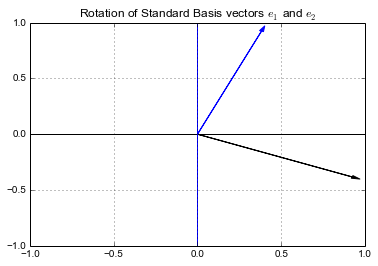

In [15]:
plt.arrow(0, 0, J_theta[0,0], J_theta[1,0], head_width=0.025, head_length=0.05, fc='k', ec='k', label="$e_1$");
plt.arrow(0, 0, J_theta[0,1], J_theta[1,1], head_width=0.025, head_length=0.05, fc='b', ec='b', label="$e_2$");
plt.grid(True);
plt.xlim([-1,1]);
plt.ylim([-1,1]);
plt.axhline(y=0, color='k');
plt.axvline(x=0, color='b');
plt.title("Rotation of Standard Basis vectors $e_1$ and $e_2$");
plt.show();

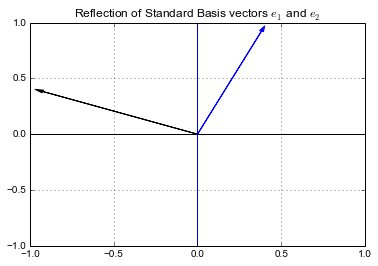

In [16]:
plt.arrow(0, 0, F_theta[0,0], F_theta[1,0], head_width=0.025, head_length=0.05, fc='k', ec='k', label="$e_1$");
plt.arrow(0, 0, F_theta[0,1], F_theta[1,1], head_width=0.025, head_length=0.05, fc='b', ec='b', label="$e_2$");
plt.grid(True);
plt.xlim([-1,1]);
plt.ylim([-1,1]);
plt.axhline(y=0, color='k');
plt.axvline(x=0, color='b');
plt.title("Reflection of Standard Basis vectors $e_1$ and $e_2$");
plt.show();

#### (b) QR decomposition by Givens Rotations

Without lost of generality, let $A$ be an $m \times n$ matrix with $m \leq n$. And $Q_{ij}$ be the matrix making $a_{ij}$ entry of the matrix 0. Then,

\begin{equation}
\begin{split}
Q_{ij} = 
\begin{bmatrix} 
I_{i-2} & 0 & 0 \\
0 & J_\theta & 0 \\
0 & 0 & I_{m-i}
\end{bmatrix}
\end{split}
\end{equation}

where $cos{\theta} = \dfrac{a_{i-1,j}}{\sqrt{a^2_{i-1,j}+a^2_{i,j}}}$ and $sin{\theta} = \dfrac{-a_{i,j}}{\sqrt{a^2_{i-1,j}+a^2_{i,j}}}$.

$Q_{ij}^*Q_{ij} = I$, therefore $Q_{ij}$ is unitary. Then following algorithm decomposes $A$ into $QR$:


>```python
R = A;
Q = I;
for j = 1,2,...,n:
    for i= m,m-1,...,2:
        R = Q_ij * R;
        Q = Q_ij * Q;
}
Q = transpose(Q);
```

And because $Q_{ij}$ matrices has a special form, we do not need to multiply matrices explicitly, instead we could rotate corresponding 2d vectors.

### 11.3

In [17]:
m = 50;
n = 12;
t = np.linspace(0,1,m);
A = np.vander(t,n);
b = np.cos(4*t);

#### (a) Normal Equations

In [18]:
L = LA.cholesky(A.T.dot(A));
Ab = A.T.dot(b);
w = LA.solve(L,Ab);
x_a = LA.solve(L.T,w);

Coefficients:
[  8.91911499e-02  -3.81003172e-01   2.32498275e-02   1.66872910e+00
  -5.28870550e-02  -5.66014196e+00  -8.89634885e-03   1.06682635e+01
  -1.55499997e-04  -7.99999311e+00  -8.39063602e-08   1.00000000e+00]


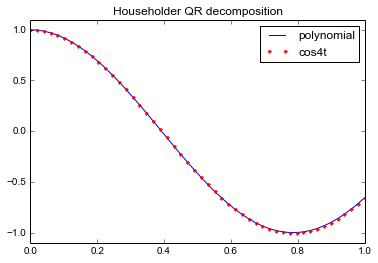

In [19]:
print "Coefficients:\n",x_a
plt.plot(t,np.polyval(x_a,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("Householder QR decomposition");
plt.legend();

#### (b)  Modified Gram-Schmidt

In [20]:
def mgs(A):
    m,n = A.shape;
    Q = np.zeros([m,n],dtype=np.float);
    R = np.zeros([n,n],dtype=np.float);
    for j in range(n):
        v  = A[:,j];
        for i in range(j):
            R[i,j] = Q[:,i].T.dot(v);
            v = v - R[i,j]*Q[:,i];
        R[j,j] = LA.norm(v);
        Q[:,j] = v / R[j,j];
    return Q, R

In [21]:
Q,R = mgs(A);
x_b = LA.solve(R,Q.T.dot(b))

Coefficients:
[  8.79017099e-02  -3.73493106e-01   4.29288930e-03   1.69588504e+00
  -7.71634424e-02  -5.64611679e+00  -1.41382970e-02   1.06694961e+01
  -3.26493756e-04  -7.99998078e+00  -4.32693452e-07   1.00000000e+00]


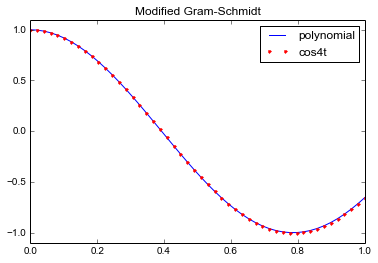

In [22]:
print "Coefficients:\n",x_b
plt.plot(t,np.polyval(x_b,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("Modified Gram-Schmidt");
plt.legend();

#### (c) Householder QR factorization

In [23]:
def sign(x): 
    return 2*(x>=0) - 1;

In [24]:
def house(A):
    m,n = A.shape;
    V = np.zeros([m,n],dtype=np.float);
    R = np.empty([m,n],dtype=np.float);
    R[:] = A;
    for k in range(n):
        v = R[k:,k].ravel();
        v[0] = sign(v[0])*LA.norm(v) + v[0];
        v /= LA.norm(v);
        V[k:,k] = v;
        R[k:, k:] = R[k:, k:] - 2 * np.einsum("i,j,jk->ik",v, v, R[k:,k:]);

    Q = np.eye(m,n);
    for j in range(n):
        for k in range(n)[::-1]:
            Q[k:,j] = Q[k:,j] - 2 * np.einsum("i,i->",V[k:, k],Q[k:,j]) * V[k:, k];
    return Q,R[:n,:]

In [25]:
Q,R = house(A);
x_c = LA.solve(R,Q.T.dot(b));

Coefficients:
[  8.80405765e-02  -3.74241706e-01   6.03211330e-03   1.69360696e+00
  -7.53160207e-02  -5.64707563e+00  -1.38202877e-02   1.06694308e+01
  -3.18763240e-04  -7.99998124e+00  -4.22743080e-07   1.00000000e+00]


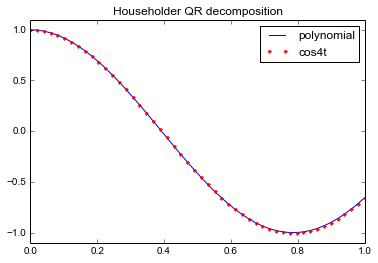

In [26]:
print "Coefficients:\n",x_c
plt.plot(t,np.polyval(x_c,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("Householder QR decomposition");
plt.legend();

#### (d) Numpy Householder QR

In [27]:
Q,R = LA.qr(A);
x_d = LA.solve(R,Q.T.dot(b));

Coefficients:
[  8.80405750e-02  -3.74241698e-01   6.03209411e-03   1.69360698e+00
  -7.53160431e-02  -5.64707562e+00  -1.38202923e-02   1.06694308e+01
  -3.18763392e-04  -7.99998124e+00  -4.22743506e-07   1.00000000e+00]


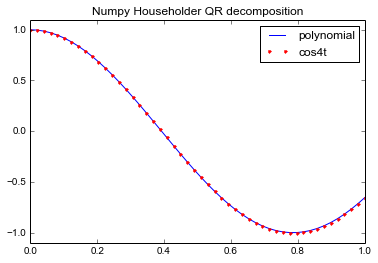

In [28]:
print "Coefficients:\n",x_d
plt.plot(t,np.polyval(x_d,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("Numpy Householder QR decomposition");
plt.legend();

#### (e) numpy.linalg.lstsq

In [29]:
x_e = LA.lstsq(A,b)[0];

Coefficients:
[  8.80405750e-02  -3.74241697e-01   6.03209303e-03   1.69360699e+00
  -7.53160443e-02  -5.64707562e+00  -1.38202925e-02   1.06694308e+01
  -3.18763399e-04  -7.99998124e+00  -4.22743530e-07   1.00000000e+00]


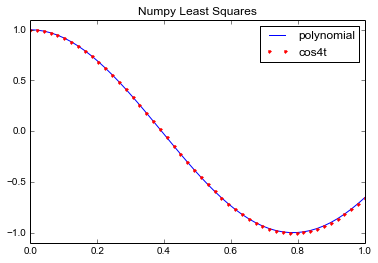

In [30]:
print "Coefficients:\n",x_e
plt.plot(t,np.polyval(x_e,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("Numpy Least Squares");
plt.legend();

#### (f) SVD

In [31]:
U,S,V = LA.svd(A, full_matrices=False);
x_f = (V.T).dot(np.diag(1/S)).dot(U.T).dot(b);

Coefficients:
[  8.80405750e-02  -3.74241697e-01   6.03209180e-03   1.69360699e+00
  -7.53160454e-02  -5.64707562e+00  -1.38202924e-02   1.06694308e+01
  -3.18763397e-04  -7.99998124e+00  -4.22743518e-07   1.00000000e+00]


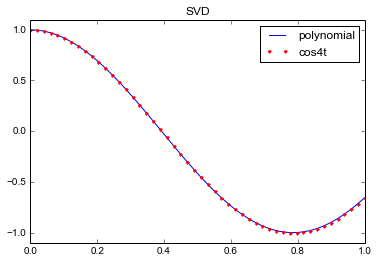

In [32]:
print "Coefficients:\n",x_f
plt.plot(t,np.polyval(x_f,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("SVD");
plt.legend();

#### (g) Observations

Coefficients on a colormap looks smooth. They are nearly same.

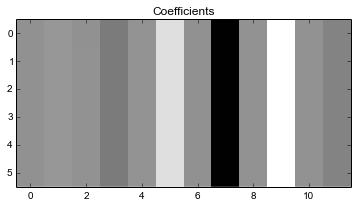

In [33]:
B = np.array([x_a,x_b,x_c,x_d,x_e,x_f]);
plt.imshow(B,cmap="gray_r",interpolation="none");
plt.title("Coefficients");

But, if we plot their difference from the mean, first and second methods are looks more different. Because they are numerically less stable methods.

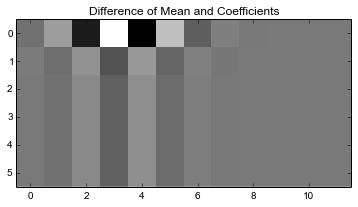

In [34]:
D = B - np.mean(B,axis=0);
plt.imshow(D,cmap="gray_r",interpolation="none");
plt.title("Difference of Mean and Coefficients");